**Coursebook: Reshaping and Visualization**
- Part 3 of Data Analytics Specialization
- Course Length: 12 hours
- Last Updated: February 2020
___

- Author: [Samuel Chan](https://github.com/onlyphantom)
- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

## Top-Down Approach 

The coursebook is part of the **Data Analytics Specialization** offered by [Algoritma](https://algorit.ma). It takes a more accessible approach compared to Algoritma's core educational products, by getting participants to overcome the "how" barrier first, rather than a detailed breakdown of the "why". 

This translates to an overall easier learning curve, one where the reader is prompted to write short snippets of code in frequent intervals, before being offered an explanation on the underlying theoretical frameworks. Instead of mastering the syntactic design of the Python programming language, then moving into data structures, and then the `pandas` library, and then the mathematical details in an imputation algorithm, and its code implementation; we would do the opposite: Implement the imputation, then a succinct explanation of why it works and applicational considerations (what to look out for, what are assumptions it made, when _not_ to use it etc).

## Training Objectives

This coursebook is intended for participants who have completed the preceding courses offered in the **Data Analytics Developer Specialization**. This is the third course, **Reshaping and Visualization**.

The coursebook focuses on:
- Stacking and Unstacking
- Working with MultiIndex DataFrames
- Reshaping your DataFrame with Melt
- Using Group By Effectively
- Visual Data Exploratory

At the end of this course is a Learn by Building section, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

# Reproducible Environment

There are some new packages we'll use in this material. Usually, we can use `pip install`/`conda install` to install new libraries to our environment. But for now, let's try on another approach on preparing libraries needed for a certain project.

Imagine you're working with your team on a collaborative project. You initialize the project with certain dependencies and versions on your computer and all goes well. Later on, you need to 'ship' that project to your team which requires them to set up the same environment as yours. What would you do then to make sure that program will also runs smoothly on their machine? 

This is where you need to make your environment reproducible by creating a `requirements.txt` file.

If you browse on `/assets` directory on this repository, you'll find a file called `requirements.txt`. This file is used for specifying what python packages are required to run a certain project. If you open up the file, you will see something that looks similar to this:

backcall==0.1.0  
certifi==2019.11.28  
chardet==3.0.4  
cycler==0.10.0  
decorator==4.4.0  
idna==2.9  
ipython==7.7.0  
......


Notice we have a line for each package, then a version number. This is important because as you start developing your python applications, you will develop the application with specific versions of the packages in mind. In simple, `requirements.txt` helps to keep track of what version of each package you are using to prevent unexpected changes.

## Importing Requirements

We have discussed what the requirement files is for but how do we use it? Since we don't want to manually install and track every package needed for a certain project, let's try to import the requirements with the following steps:

**Step 1**: Prepare a "blank" new environment and activate it

```
conda env create -n <ENV_NAME> python=<PYTHON_VERSION>
conda activate <ENV_NAME>
```

**Step 2**: Navigate to the folder with your `requirements.txt`

```
cd <PATH_TO_REQUIREMENTS>
```

**Step 3**: Install the requirements

```
pip install -r requirements.txt
```

You have now successfuly installed all the requirements needed on this material! For your convenience, don't forget to link your new environment to jupyter-notebook using kernel:

```
pip install ipykernel
python -m ipykernel install --user --name=<ENV_NAME>
```

## Exporting Requirements

The `pip install` command always installs the latest published version of a package, but sometimes, you may want to install a specific version that you know works on your project.

Requirement files allow you to specify exactly which packages and versions should be installed. You can follow these steps to generate your requirement files:

**Step 1**: Activate desired environment

```
conda activate <ENV_NAME>
```

**Step 2**: Navigate to the folder where you want to save the `requirements.txt`
```
cd <PATH_TO_REQUIREMENTS>
```

**Step 3**: Freeze the environment

```
pip freeze > requirements.txt
```
The `freeze` command dumps all the packages and their versions to a standardized output. You can save it by any name you want but the convention is to name it as requirements.txt.

Now that you've discovered how to make your environment reproducible, we can back to our main focus of this week material; data reshaping and visualisation with pandas!

# Data Wrangling and Reshaping

In the previous two courses, we've got our hands on a few common techniques and learned how to explore data using `pandas` built-in methods. Specifically, we've  in the first and second part of this series how to use the following inspection, diagnostic and exploratory tools: 

**Data Inspection**
- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`
- Subsetting using `.loc`, `.iloc` and conditionals
---
**Diagnostic and Exploratory**
- Tables
- Cross-Tables and Aggregates
- Using `aggfunc` for aggregate functions
- Pivot Tables
- Working with DateTime
- Working with Categorical Data
- Duplicates and Missing Value Treatment

The first half of this course serves as an extension from the last. We'll pick up some new techniques to supplement our EDA toolset. Let us begin with reshaping techniques. 

In [316]:
from pandas_datareader import data
import pandas as pd

In [317]:
symbol = ['AAPL', 'FB', 'GOOGL']
source = 'yahoo'
start_date = '2018-01-01'
end_date = '2019-04-24'
stock = data.DataReader(symbol, source, start_date, end_date)
stock.head()

Attributes   Adj Close                                Close              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  166.804016  181.419998  1073.209961  172.259995  181.419998   
2018-01-03  166.774963  184.669998  1091.520020  172.229996  184.669998   
2018-01-04  167.549622  184.330002  1095.760010  173.029999  184.330002   
2018-01-05  169.457214  186.850006  1110.290039  175.000000  186.850006   
2018-01-08  168.827820  188.279999  1114.209961  174.350006  188.279999   

Attributes                     High                                  Low  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1073.209961  172.300003  181.580002  1075.979980  169.259995   
2018-01-03  1091.520020  174.550003  184.779999  1096.099976  171.960007   
2018-01-04  1095.760010  173.470001  186.210007  1104.079956  172.080002   
2018-01-05  1110.290039  175.369995  186.899994  1113.579956  173.050003   
2018-01-08  1114.209961  175.610001  188.899994  1119.160034  173.929993   

Attributes                                 Open                           \
Symbols             FB        GOOGL        AAPL          FB        GOOGL   
Date                                                                       
2018-01-02  177.550003  1053.020020  170.160004  177.679993  1053.020020   
2018-01-03  181.330002  1073.430054  172.529999  181.880005  1073.930054   
2018-01-04  184.100006  1094.260010  172.539993  184.899994  1097.089966   
2018-01-05  184.929993  1101.800049  173.440002  185.589996  1103.449951   
2018-01-08  186.330002  1110.000000  174.350006  187.199997  1111.000000   

Attributes      Volume                         
Symbols           AAPL          FB      GOOGL  
Date                                           
2018-01-02  25555900.0  18151900.0  1588300.0  
2018-01-03  29517900.0  16886600.0  1565900.0  
2018-01-04  22434600.0  13880900.0  1302600.0  
2018-01-05  23660000.0  13574500.0  1512500.0  
2018-01-08  20567800.0  17994700.0  1232200.0

If you do not have the `pandas_datareader` module installed, or if you're following along this coursebook without an active connection, you can instead load it from the serialized object I stored in your `data_cache` folder. 

Creating the DataFrame object by reading from `pickle`:
- `stock = pd.read_pickle('data_cache/stock')`

Serializing the DataFrame object to a byte stream using `pickle`:
- `stock.to_pickle('data_cache/stock')`

<!--
import pickle
a = 12
f= open("haha","wb")
pickle.dump(a, f)
f.close()

f=open("haha", "rb")
b = pickle.load(f)
f.close()
-->

In [168]:
# stock.to_pickle('data_cache/stock')
stock = pd.read_pickle('data_cache/stock')
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961

Notice how the data frame is a multi-index data frame. If you pay close attention, you can see a 2 levels of column axis: `Attributes` and `Symbols`. If you were to subset the data using square bracket, you will be accessing the highest level index:

In [169]:
stock.to_csv('namafile.csv', index=True)

In [170]:
stock['Close'].head()

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,172.259995,181.419998,1073.209961
2018-01-03,172.229996,184.669998,1091.520020
2018-01-04,173.029999,184.330002,1095.760010
2018-01-05,175.000000,186.850006,1110.290039
2018-01-08,174.350006,188.279999,1114.209961


Subsetting the `Close` column from the data frame will leave us with a single index column from the `Symbols` level.

**Dive Deeper:**

Create a DataFrame by subsetting only the `Close` columns. Name it `closingprice`. Then, use `.isna().sum()` to count the number of missing values in each of the columns present in `closingprice`.

If there are any missing values, use the `.fillna(method='ffill')` method to fill those missing values:

In [171]:
stock

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   
...                ...         ...          ...         ...         ...   
2019-04-17  203.380005  180.740005  1245.099976  198.610001  178.360001   
2019-04-18  204.149994  178.880005  1245.939941  202.520004  177.339996   
2019-04-22  204.940002  181.669998  1254.339966  202.339996  178.250000   
2019-04-23  207.750000  184.220001  1274.430054  203.899994  181.479996   
2019-04-24  208.479996  185.139999  1274.000000  207.050003  181.649994   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   
...                 ...         ...         ...          ...         ...   
2019-04-17  1232.900024  199.539993  179.600006  1237.000000  203.130005   
2019-04-18  1239.410034  203.119995  178.800003  1245.000000  203.860001   
2019-04-22  1233.369995  202.830002  178.250000  1236.670044  204.529999   
2019-04-23  1251.969971  204.429993  182.740005  1256.640015  207.479996   
2019-04-24  1259.810059  207.360001  184.490005  1270.589966  207.160004   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   
...                ...          ...         ...         ...        ...   
2019-04-17  178.779999  1240.140015  28906800.0   9973700.0  1518300.0   
2019-04-18  178.279999  1241.469971  24195800.0  11655600.0  1237500.0   
2019-04-22  181.440002  1253.760010  19439500.0  13389900.0   954200.0   
2019-04-23  183.779999  1270.589966  23323000.0  19954800.0  1593400.0   
2019-04-24  182.580002  1260.050049  17540600.0  37289900.0  1169800.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961  
...                ...         ...          ...  
2019-04-17  203.130005  178.779999  1240.140015  
2019-04-18  203.860001  178.279999  1241.469971  
2019-04-22  204.529999  181.440002  1253.760010  
2019-04-23  207.479996  183.779999  1270.589966  
2019-04-24  207.160004  182.580002  1260.050049  

[329 rows x 18 columns]

In [172]:
## Your code below

closingprice = stock['Close']
closingprice.isna().sum()
## -- Solution code

Symbols
AAPL     0
FB       0
GOOGL    0
dtype: int64

In [173]:
closingprice.head(10)

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,172.259995,181.419998,1073.209961
2018-01-03,172.229996,184.669998,1091.520020
2018-01-04,173.029999,184.330002,1095.760010
2018-01-05,175.000000,186.850006,1110.290039
2018-01-08,174.350006,188.279999,1114.209961
2018-01-09,174.330002,187.869995,1112.790039
2018-01-10,174.289993,187.839996,1110.140015
2018-01-11,175.279999,187.770004,1112.050049
2018-01-12,177.089996,179.369995,1130.650024


If you pay close attention to the index of `stock`, you may already realized by now that there are days where no records were present. 2018-01-01, 2018-01-06, and 2018-01-07 were absent from our DataFrame because they happen to fall on weekends.

While the trading hours of [different stock markets differ](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) (the NYSE for example open its market floor from 9.30am to 4pm five days a week), on weekends as well as federal holidays all stock exchanges are closed for business.

We can create (or recreate) the index by passing in our own values. In the following cell we created a date range and create the index using that new date range:

In [174]:
pd.date_range(start="2019-01-01", end="2019-03-31")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

In [175]:
closingprice = stock['Close']
quarter1 = pd.date_range(start="2019-01-01", end="2019-03-31")
closingprice = closingprice.reindex(quarter1)
closingprice

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,157.919998,135.679993,1054.680054
2019-01-03,142.190002,131.740005,1025.469971
2019-01-04,148.259995,137.949997,1078.069946
2019-01-05,NaN,NaN,NaN
...,...,...,...
2019-03-27,188.470001,165.869995,1178.010010
2019-03-28,188.720001,165.550003,1172.270020
2019-03-29,189.949997,166.690002,1176.890015
2019-03-30,NaN,NaN,NaN


Now use forward-fill to fill the `NA` values:

In [176]:
## Your code below
closingprice.ffill()

## -- Solution code

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,157.919998,135.679993,1054.680054
2019-01-03,142.190002,131.740005,1025.469971
2019-01-04,148.259995,137.949997,1078.069946
2019-01-05,148.259995,137.949997,1078.069946
...,...,...,...
2019-03-27,188.470001,165.869995,1178.010010
2019-03-28,188.720001,165.550003,1172.270020
2019-03-29,189.949997,166.690002,1176.890015
2019-03-30,189.949997,166.690002,1176.890015


## `stack()` and `unstack()`

`stack()` stack the prescribed level(s) from columns to index and is particularly useful on DataFrames having a multi-level columns. It does so by "shifting" the columns to create new levels on its index. 

This is easier understood when we just see an example. Notice that `stock` has a 2-level column (Attributes and Symbols) and 1-level index (Date):

In [177]:
stock.head(10)

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   
2018-01-09  175.059998  188.800003  1118.439941  173.410004  187.100006   
2018-01-10  174.300003  187.889999  1112.780029  173.000000  185.630005   
2018-01-11  175.490005  188.399994  1114.849976  174.490005  187.380005   
2018-01-12  177.360001  181.479996  1131.300049  175.649994  177.399994   
2018-01-16  179.389999  181.750000  1148.880005  176.139999  178.039993   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   
2018-01-09  1108.199951  174.550003  188.699997  1118.439941  174.330002   
2018-01-10  1103.979980  173.160004  186.940002  1107.000000  174.289993   
2018-01-11  1106.479980  174.589996  188.399994  1112.310059  175.279999   
2018-01-12  1108.010010  176.179993  178.059998  1110.099976  177.089996   
2018-01-16  1126.660034  177.899994  181.500000  1140.310059  176.190002   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   
2018-01-09  187.869995  1112.790039  21584000.0  12393100.0  1340400.0   
2018-01-10  187.839996  1110.140015  23959900.0  10529900.0  1036700.0   
2018-01-11  187.770004  1112.050049  18667700.0   9588600.0  1121200.0   
2018-01-12  179.369995  1130.650024  25226000.0  77306900.0  1929300.0   
2018-01-16  178.389999  1130.699951  29565900.0  36183800.0  1823100.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961  
2018-01-09  171.018005  187.869995  1112.790039  
2018-01-10  170.978760  187.839996  1110.140015  
2018-01-11  171.949951  187.770004  1112.050049  
2018-01-12  173.725571  179.369995  1130.650024  
2018-01-16  172.842682  178.389999  1130.699951

When we stack the `stock` DataFrame, we shrink the number of levels on its column by one: `stock` now has 1-level column named `Attributes`: 

`unstack()` does the opposite: it "shifts" the levels from index axis onto column axis. Try and create a stack DataFrame, and then apply `unstack` on the new DataFrame to see it return to the original shape:

**Dive Deeper**


1. How to swap the position (level) of Symbols and Attributes ? 
2. Based on your knowledge, what company (symbol) worth invest on ? (You may look on its fluctuations, means, etc)

In [178]:
# Answers : 
# 1. 
stock.stack(level=0).unstack(level=1)

Symbols           AAPL                                                  \
Attributes   Adj Close       Close        High         Low        Open   
Date                                                                     
2018-01-02  168.987320  172.259995  172.300003  169.259995  170.160004   
2018-01-03  168.957886  172.229996  174.550003  171.960007  172.529999   
2018-01-04  169.742706  173.029999  173.470001  172.080002  172.539993   
2018-01-05  171.675278  175.000000  175.369995  173.050003  173.440002   
2018-01-08  171.037628  174.350006  175.610001  173.929993  174.350006   
...                ...         ...         ...         ...         ...   
2019-04-17  203.130005  203.130005  203.380005  198.610001  199.539993   
2019-04-18  203.860001  203.860001  204.149994  202.520004  203.119995   
2019-04-22  204.529999  204.529999  204.940002  202.339996  202.830002   
2019-04-23  207.479996  207.479996  207.750000  203.899994  204.429993   
2019-04-24  207.160004  207.160004  208.479996  207.050003  207.360001   

Symbols                         FB                                      \
Attributes      Volume   Adj Close       Close        High         Low   
Date                                                                     
2018-01-02  25555900.0  181.419998  181.419998  181.580002  177.550003   
2018-01-03  29517900.0  184.669998  184.669998  184.779999  181.330002   
2018-01-04  22434600.0  184.330002  184.330002  186.210007  184.100006   
2018-01-05  23660000.0  186.850006  186.850006  186.899994  184.929993   
2018-01-08  20567800.0  188.279999  188.279999  188.899994  186.330002   
...                ...         ...         ...         ...         ...   
2019-04-17  28906800.0  178.779999  178.779999  180.740005  178.360001   
2019-04-18  24195800.0  178.279999  178.279999  178.880005  177.339996   
2019-04-22  19439500.0  181.440002  181.440002  181.669998  178.250000   
2019-04-23  23323000.0  183.779999  183.779999  184.220001  181.479996   
2019-04-24  17540600.0  182.580002  182.580002  185.139999  181.649994   

Symbols                                   GOOGL                            \
Attributes        Open      Volume    Adj Close        Close         High   
Date                                                                        
2018-01-02  177.679993  18151900.0  1073.209961  1073.209961  1075.979980   
2018-01-03  181.880005  16886600.0  1091.520020  1091.520020  1096.099976   
2018-01-04  184.899994  13880900.0  1095.760010  1095.760010  1104.079956   
2018-01-05  185.589996  13574500.0  1110.290039  1110.290039  1113.579956   
2018-01-08  187.199997  17994700.0  1114.209961  1114.209961  1119.160034   
...                ...         ...          ...          ...          ...   
2019-04-17  179.600006   9973700.0  1240.140015  1240.140015  1245.099976   
2019-04-18  178.800003  11655600.0  1241.469971  1241.469971  1245.939941   
2019-04-22  178.250000  13389900.0  1253.760010  1253.760010  1254.339966   
2019-04-23  182.740005  19954800.0  1270.589966  1270.589966  1274.430054   
2019-04-24  184.490005  37289900.0  1260.050049  1260.050049  1274.000000   

Symbols                                          
Attributes          Low         Open     Volume  
Date                                             
2018-01-02  1053.020020  1053.020020  1588300.0  
2018-01-03  1073.430054  1073.930054  1565900.0  
2018-01-04  1094.260010  1097.089966  1302600.0  
2018-01-05  1101.800049  1103.449951  1512500.0  
2018-01-08  1110.000000  1111.000000  1232200.0  
...                 ...          ...        ...  
2019-04-17  1232.900024  1237.000000  1518300.0  
2019-04-18  1239.410034  1245.000000  1237500.0  
2019-04-22  1233.369995  1236.670044   954200.0  
2019-04-23  1251.969971  1256.640015  1593400.0  
2019-04-24  1259.810059  1270.589966  1169800.0  

[329 rows x 18 columns]

**2**.

There are many ways to answer questions number 2. Here's the summary of your answers yesterday

**Overal Growth**<br>
Using Overal Growth. By subtracting current price with initial price, we can see the growth of each stock 

In [179]:
# Overal Growth Values
stock['Close'].iloc[-1,:] - stock['Close'].iloc[0,:]

Symbols
AAPL      34.900009
FB         1.160004
GOOGL    186.840088
dtype: float64

If we see from the values above, surely google has a big growth. But, we need to know how much the stock grew. By looking into its percentage, we might get a different answer

In [180]:
# Oveal Growth Percentage
(stock['Close'].iloc[-1,:] - stock['Close'].iloc[0,:]) / stock['Close'].iloc[0,:]

Symbols
AAPL     0.202601
FB       0.006394
GOOGL    0.174095
dtype: float64


The growth percentage shows that Apple (AAPL) is growing the most. 

**Risk Factor**<br>
Now, let's see the risk factor. We can use standard deviation to see it. High standard deviation (std) means the stock is fluctuative. The larger the std, the wider the price get dispersed from the average price. 

In [181]:
stock['Close'].std()

Symbols
AAPL     20.569725
FB       18.819945
GOOGL    68.145956
dtype: float64

The standard deviation in Google is closer to zero, means that google are more fluctuative than the other. Is it ? Let's see the std percentage by dividing them by the means

In [182]:
stock['Close'].std() / stock['Close'].mean()

Symbols
AAPL     0.110583
FB       0.111026
GOOGL    0.060377
dtype: float64

Now we see that actually Facebook has higher std, followed by Apple and Google. Larger STD could means larger growth. So, we are more likely to chooe Apple for its high STD and High growth percentage. 

If you need the quick visualization, you can use `.plot` for each stock 

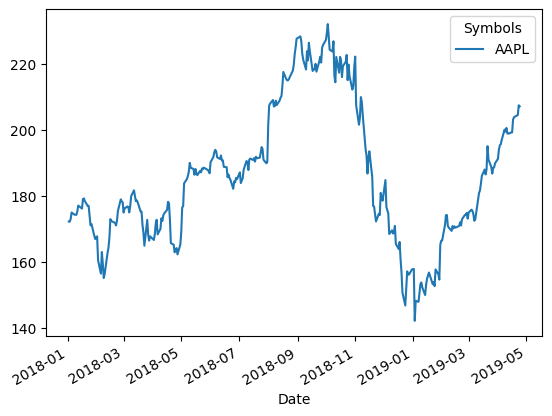

In [183]:
stock['Close'][['AAPL']].plot()

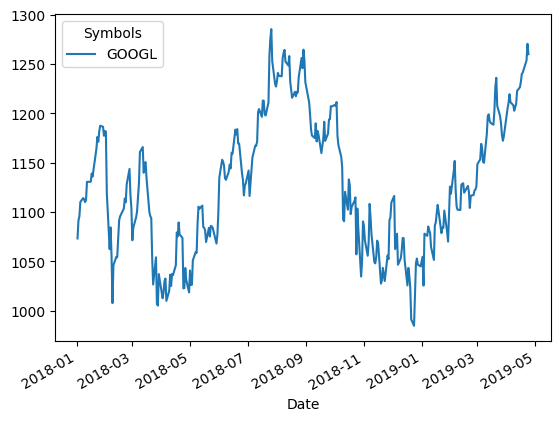

In [184]:
stock['Close'][['GOOGL']].plot()

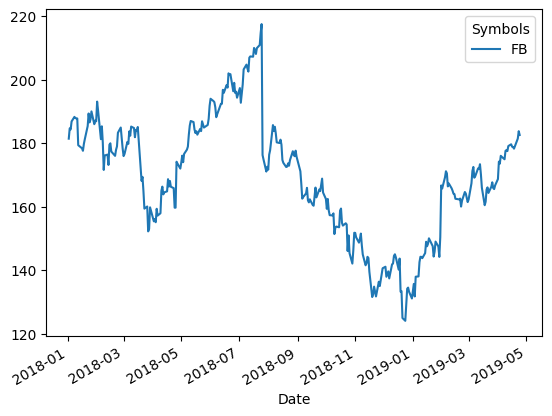

In [185]:
stock['Close'][['FB']].plot()

**Knowledge Check:** Stack and Unstack

Which of the following statement is correct?

- [ ] `stack()` changes the DataFrame from wide to long
- [ ] `unstack()` changes the DataFrame from long to wide
- [ ] `unstack()` changes the DataFrame from wide to long

<br><br><br><br><br><br>
___
*Day 2 Start*
<br><br><br><br><br><br>

## Melt

Speaking of reshaping a DataFrame from wide format to long, another method that should be in your toolset is `melt()`. Consider the following DataFrame, which is created from `pandas` MultiIndex Slicers method, `.xs()`:

In [186]:
# stock.swaplevel(i=1, j=0, axis=1)['AAPL']
stock

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   
...                ...         ...          ...         ...         ...   
2019-04-17  203.380005  180.740005  1245.099976  198.610001  178.360001   
2019-04-18  204.149994  178.880005  1245.939941  202.520004  177.339996   
2019-04-22  204.940002  181.669998  1254.339966  202.339996  178.250000   
2019-04-23  207.750000  184.220001  1274.430054  203.899994  181.479996   
2019-04-24  208.479996  185.139999  1274.000000  207.050003  181.649994   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   
...                 ...         ...         ...          ...         ...   
2019-04-17  1232.900024  199.539993  179.600006  1237.000000  203.130005   
2019-04-18  1239.410034  203.119995  178.800003  1245.000000  203.860001   
2019-04-22  1233.369995  202.830002  178.250000  1236.670044  204.529999   
2019-04-23  1251.969971  204.429993  182.740005  1256.640015  207.479996   
2019-04-24  1259.810059  207.360001  184.490005  1270.589966  207.160004   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   
...                ...          ...         ...         ...        ...   
2019-04-17  178.779999  1240.140015  28906800.0   9973700.0  1518300.0   
2019-04-18  178.279999  1241.469971  24195800.0  11655600.0  1237500.0   
2019-04-22  181.440002  1253.760010  19439500.0  13389900.0   954200.0   
2019-04-23  183.779999  1270.589966  23323000.0  19954800.0  1593400.0   
2019-04-24  182.580002  1260.050049  17540600.0  37289900.0  1169800.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961  
...                ...         ...          ...  
2019-04-17  203.130005  178.779999  1240.140015  
2019-04-18  203.860001  178.279999  1241.469971  
2019-04-22  204.529999  181.440002  1253.760010  
2019-04-23  207.479996  183.779999  1270.589966  
2019-04-24  207.160004  182.580002  1260.050049  

[329 rows x 18 columns]

XS = Cross Section

In [187]:
aapl = stock.xs(key = 'GOOGL', level='Symbols', axis=1)
aapl.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1075.979980,1053.020020,1053.020020,1073.209961,1588300.0,1073.209961
2018-01-03,1096.099976,1073.430054,1073.930054,1091.520020,1565900.0,1091.520020
2018-01-04,1104.079956,1094.260010,1097.089966,1095.760010,1302600.0,1095.760010
2018-01-05,1113.579956,1101.800049,1103.449951,1110.290039,1512500.0,1110.290039
2018-01-08,1119.160034,1110.000000,1111.000000,1114.209961,1232200.0,1114.209961


In [188]:
aapl.shape

(329, 6)

The DataFrame above is wide: it has 329 rows and 6 columns. The `melt()` function gathers all the columns into one and store the value corresponding to each column such that the resulting DataFrame has 329 * 6 = 1,974 rows, along with the identifier and values columns:

In [189]:
aapl

Attributes,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1075.979980,1053.020020,1053.020020,1073.209961,1588300.0,1073.209961
2018-01-03,1096.099976,1073.430054,1073.930054,1091.520020,1565900.0,1091.520020
2018-01-04,1104.079956,1094.260010,1097.089966,1095.760010,1302600.0,1095.760010
2018-01-05,1113.579956,1101.800049,1103.449951,1110.290039,1512500.0,1110.290039
2018-01-08,1119.160034,1110.000000,1111.000000,1114.209961,1232200.0,1114.209961
...,...,...,...,...,...,...
2019-04-17,1245.099976,1232.900024,1237.000000,1240.140015,1518300.0,1240.140015
2019-04-18,1245.939941,1239.410034,1245.000000,1241.469971,1237500.0,1241.469971
2019-04-22,1254.339966,1233.369995,1236.670044,1253.760010,954200.0,1253.760010


In [190]:
aapl_melted = aapl.melt()
aapl_melted

,Attributes,value
0,High,1075.979980
1,High,1096.099976
2,High,1104.079956
3,High,1113.579956
4,High,1119.160034
...,...,...
1969,Adj Close,1240.140015
1970,Adj Close,1241.469971
1971,Adj Close,1253.760010
1972,Adj Close,1270.589966


In [191]:
aapl_melted.shape

(1974, 2)

# What does melt do ? 

- Danny : Menggabungkan menjadi 1 kolom 
- Nini : Merubah shape wide -> long
- Willy : Mirip reset_index()

In [192]:
aapl[['Close', 'High']].reset_index()

Attributes,Date,Close,High
0,2018-01-02,1073.209961,1075.979980
1,2018-01-03,1091.520020,1096.099976
2,2018-01-04,1095.760010,1104.079956
3,2018-01-05,1110.290039,1113.579956
4,2018-01-08,1114.209961,1119.160034
...,...,...,...
324,2019-04-17,1240.140015,1245.099976
325,2019-04-18,1241.469971,1245.939941
326,2019-04-22,1253.760010,1254.339966
327,2019-04-23,1270.589966,1274.430054


In [193]:
aapl.head(3)

Attributes,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1075.979980,1053.020020,1053.020020,1073.209961,1588300.0,1073.209961
2018-01-03,1096.099976,1073.430054,1073.930054,1091.520020,1565900.0,1091.520020
2018-01-04,1104.079956,1094.260010,1097.089966,1095.760010,1302600.0,1095.760010


In [194]:
aapl.head(3).melt()

,Attributes,value
0,High,1.075980e+03
1,High,1.096100e+03
2,High,1.104080e+03
3,Low,1.053020e+03
4,Low,1.073430e+03
5,Low,1.094260e+03
6,Open,1.053020e+03
7,Open,1.073930e+03
8,Open,1.097090e+03
9,Close,1.073210e+03


We can optionally specify one or more columns to be identifier variables (`id_vars`), which treat all other columns as value variables (`value_vars`):

In [195]:
aapl.reset_index()

Attributes,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,1075.979980,1053.020020,1053.020020,1073.209961,1588300.0,1073.209961
1,2018-01-03,1096.099976,1073.430054,1073.930054,1091.520020,1565900.0,1091.520020
2,2018-01-04,1104.079956,1094.260010,1097.089966,1095.760010,1302600.0,1095.760010
3,2018-01-05,1113.579956,1101.800049,1103.449951,1110.290039,1512500.0,1110.290039
4,2018-01-08,1119.160034,1110.000000,1111.000000,1114.209961,1232200.0,1114.209961
...,...,...,...,...,...,...,...
324,2019-04-17,1245.099976,1232.900024,1237.000000,1240.140015,1518300.0,1240.140015
325,2019-04-18,1245.939941,1239.410034,1245.000000,1241.469971,1237500.0,1241.469971
326,2019-04-22,1254.339966,1233.369995,1236.670044,1253.760010,954200.0,1253.760010
327,2019-04-23,1274.430054,1251.969971,1256.640015,1270.589966,1593400.0,1270.589966


In [196]:
aapl.reset_index().melt()

,Attributes,value
0,Date,2018-01-02 00:00:00
1,Date,2018-01-03 00:00:00
2,Date,2018-01-04 00:00:00
3,Date,2018-01-05 00:00:00
4,Date,2018-01-08 00:00:00
...,...,...
2298,Adj Close,1240.14
2299,Adj Close,1241.47
2300,Adj Close,1253.76
2301,Adj Close,1270.59


In [197]:
aapl.reset_index().melt(value_vars=['High', 'Low'])

,Attributes,value
0,High,1075.979980
1,High,1096.099976
2,High,1104.079956
3,High,1113.579956
4,High,1119.160034
...,...,...
653,Low,1232.900024
654,Low,1239.410034
655,Low,1233.369995
656,Low,1251.969971


**Knowledge Check:** Missing Values

Add a cell below, and fill the missing values in `aapl` using any method deemed appropriate:

In [198]:
march = pd.date_range(start="2018-03-01", end="2019-03-31")
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.reindex(march)
aapl.fillna(method='ffill')

Attributes,High,Low,Open,Close,Volume,Adj Close
2018-03-01,179.779999,172.660004,178.539993,175.000000,48802000.0,172.375214
2018-03-02,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-03,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-04,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-05,177.740005,174.520004,175.210007,176.820007,28401400.0,174.167923
...,...,...,...,...,...,...
2019-03-27,189.759995,186.550003,188.750000,188.470001,29848400.0,188.470001
2019-03-28,189.559998,187.529999,188.949997,188.720001,20780400.0,188.720001
2019-03-29,190.080002,188.539993,189.830002,189.949997,23564000.0,189.949997
2019-03-30,190.080002,188.539993,189.830002,189.949997,23564000.0,189.949997


In [199]:
## Your code below


## -- Solution code

# Dive Deeper

Open `kiva_2015-01.csv` that you already downloaded, and correct the datetime data types and save it as variable `kiva`

In [200]:
# kiva = pd.read_csv('kiva_2015-01.csv')

## Question 1

Open `kiva_2015-01.csv` that you already downloaded, and correct the datetime data types and save it as variable `kiva`

using kiva, find the answer for the following questions


In Philippines, findout who `partner_id` for each `repayment_interval` that have the most `funded_amount` in total for each `sector`. Use crosstab, pivot_table, stack/unstack, or melt to answer it. 

Reference answer : 
```python
cond = kiva['country'] == 'Philippines'
phil = kiva[cond]
phil.pivot_table(
    index= ['sector'],
    columns= ['repayment_interval','partner_id',],
    values='funded_amount',
    aggfunc='sum'
)
```

## Question 2

In Philippines, reshape the data so that we can map each `partner_id` for its `sector` and `activity` has. Using melt, create this table

Reference asnwers: 
```python
phil.melt(id_vars=['partner_id'], value_vars=['sector', 'activity'])
```

# Pandas and Matplotlib

In [201]:
import matplotlib.pyplot as plt

Surely this is the point where a data analyst whip up some flashy charts using the popular `matplotlib` library? 

Well - yes. Even better, we're going to use the `DataFrame.plot()` method, built-into `pandas` which in turn calls `matplotlib` plotting functions under-the-hood. Notice that we added `matplotlib.pyplot` as an import, even though our code will not explicitly call `matplotlib` but rely on `pandas` implementation.

Now let's take a look at apple stock data frame:

In [202]:
aapl.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
2018-03-01,179.779999,172.660004,178.539993,175.000000,48802000.0,172.375214
2018-03-02,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,177.740005,174.520004,175.210007,176.820007,28401400.0,174.167923


The best way to demonstrate the efficiency gains of `DataFrame.plot()` is to see it in action. We will call `.plot()` directly on our `DataFrame` - `pandas` take care of the  matplotlib code that, [by matplotlib's own admission](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), _can be daunting to many new users_.

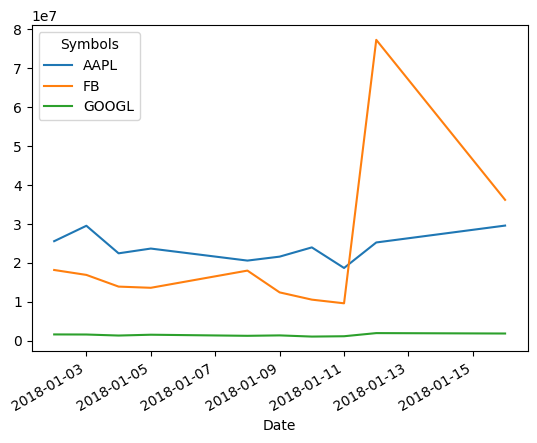

In [203]:
stock['Volume'].head(10).plot()

We can [customize our plots with style sheets](https://matplotlib.org/users/style_sheets.html) but a handy reference is within reach. You can substitute 'default' for any one of the styles available and re-run the plotting code to see the styles being applied.

In [204]:
import matplotlib.pyplot as plt

In [205]:
print(plt.style.available)
plt.style.use('default')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


Because the `.plot()` method is called on a DataFrame object, we can have an indexed DataFrame with multiple columns and `plot` will handle these using its default options:

In [206]:
aapl.fillna(method='ffill', inplace=True)

In [207]:
aapl

Attributes,High,Low,Open,Close,Volume,Adj Close
2018-03-01,179.779999,172.660004,178.539993,175.000000,48802000.0,172.375214
2018-03-02,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-03,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-04,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-05,177.740005,174.520004,175.210007,176.820007,28401400.0,174.167923
...,...,...,...,...,...,...
2019-03-27,189.759995,186.550003,188.750000,188.470001,29848400.0,188.470001
2019-03-28,189.559998,187.529999,188.949997,188.720001,20780400.0,188.720001
2019-03-29,190.080002,188.539993,189.830002,189.949997,23564000.0,189.949997
2019-03-30,190.080002,188.539993,189.830002,189.949997,23564000.0,189.949997


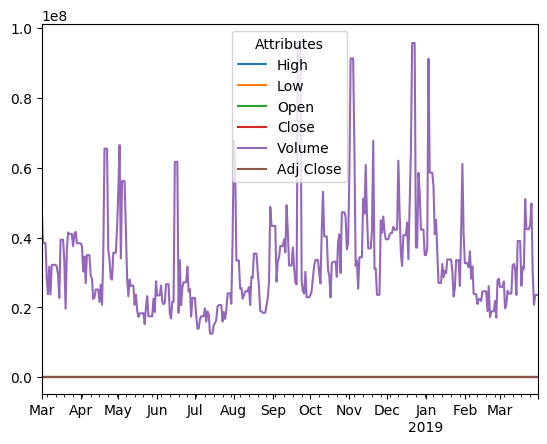

In [208]:
aapl.plot()

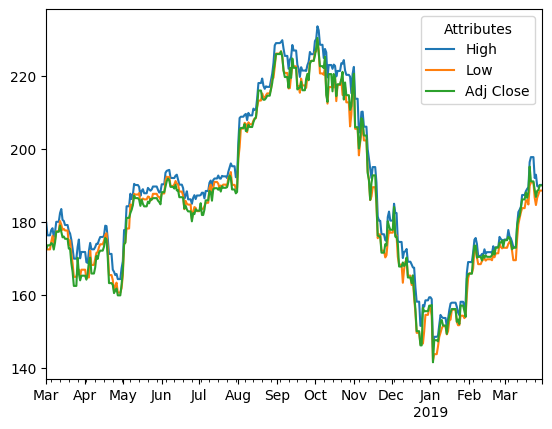

In [209]:
aapl.loc[:, ['High', 'Low', 'Adj Close']].plot()

## Other Visualization
- ‘bar’ or ‘barh’ for bar plots - stack
- ‘hist’ for histogram - stacked=False, bins=n, orientation='Horizontal', cumulative=False - df.hist
- ‘box’ for boxplot - vert=True - .boxplot(by='')
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots - stacked=True
- ‘scatter’ for scatter plots - .plot.scatter(x=, y=)
- ‘hexbin’ for hexagonal bin plots - df.plot.hexbin(x='a', y='b', gridsize=25)
- ‘pie’ for pie plots



Here are some example of several visualization above 

## 1 column operation
### Histogram
Histogram plot each column's distribution automatically using frequency. 

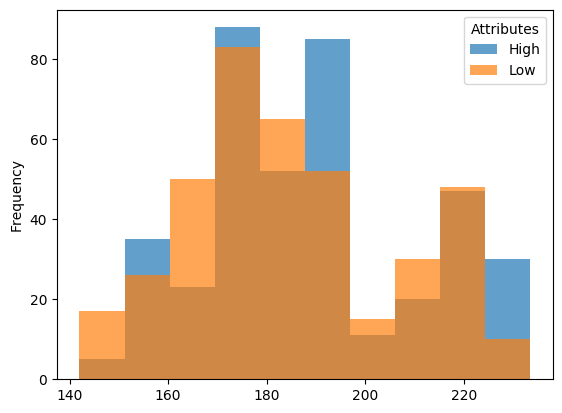

In [210]:
aapl[['High', 'Low']].plot.hist(alpha=0.7)

### Density Plot 
same as histogram, but it turns the frequency into a density (proportion or probability)

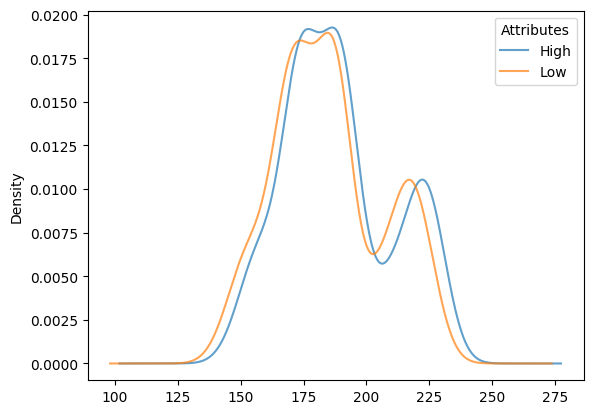

In [211]:
aapl[['High', 'Low']].plot.kde(alpha=0.7)

### Box Plot
Very useful to findout inter-quartile information and grasp information about outlier in your data

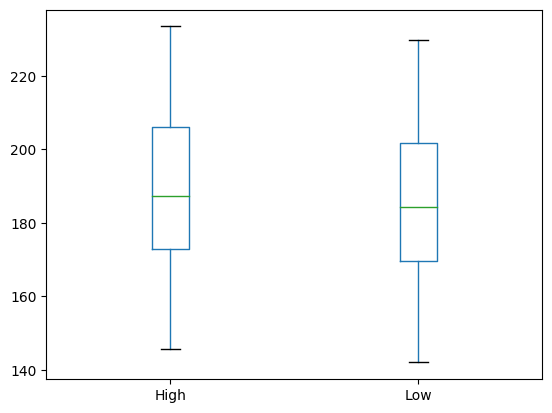

In [212]:
aapl[['High', 'Low']].plot.box()

the lower, middle, and upper line **on the box** representes 25%, 50%, and 75% of your data respectively. The most low or high line is called whisker, that denotes your data boundary. Every data that belongs outsite the whisker line is may be considered as outlier. 

In [213]:
aapl[['High']].describe()

Attributes,High
count,396.000000
mean,188.797601
std,21.597359
min,145.720001
25%,173.000000
50%,187.315002
75%,206.009995
max,233.470001


## 2 Column Operation
### Scatter 
Used to find relation between the columns

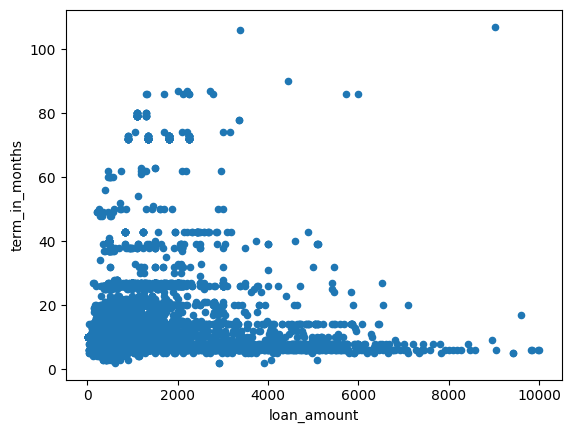

In [214]:
kiva = pd.read_csv('week3/kiva_2015-01.csv')
kiva[['loan_amount', 'term_in_months']].plot.scatter(x='loan_amount', y='term_in_months')

### HexBin
same as scatter, but gives more information on where the data really concentrated using frequency 

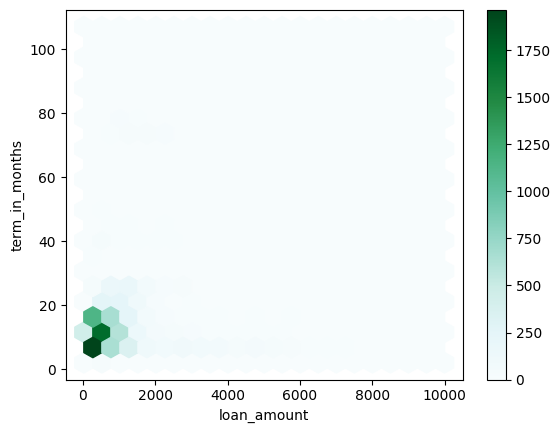

In [215]:
kiva[['loan_amount', 'term_in_months']].plot.hexbin(x='loan_amount', y='term_in_months', gridsize=20)


# Dive Deeper 
Using any Kiva dataset, findout 

1. What sector have the most loan application (frequency) ? 
2. From all the data, what is the distributuin of funded amount ? 
3. Find another intereseting insight from the data, and deliver it using visualization !

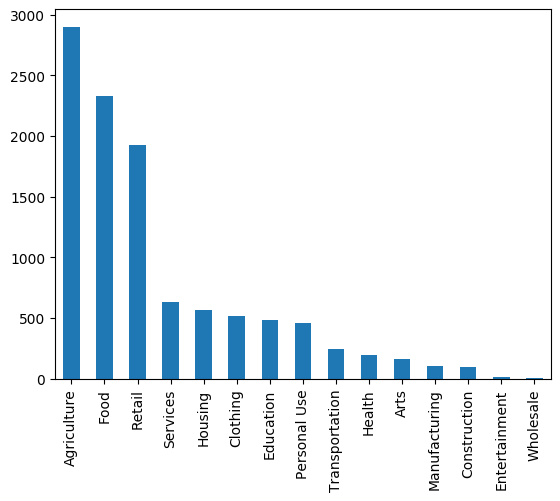

In [216]:
# Reference answer for question 1
kiva['sector'].value_counts().plot.bar()

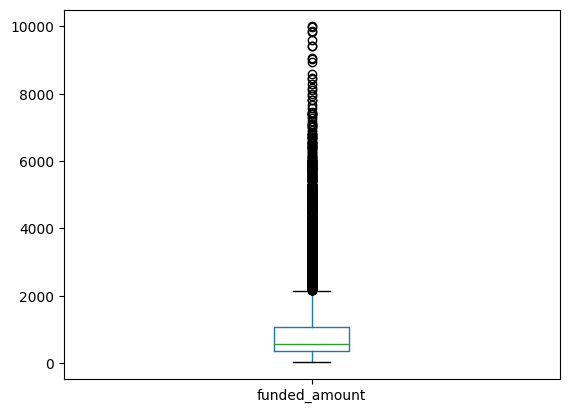

In [217]:
# reference answer for question 2
kiva['funded_amount'].plot.box()

## List of useful python visualization libraries
If you're interesting in visualization, here are some libraries that you might find useful in the future. 
- Matplotlib : Very customizable, can do everything
- Seaborn : Build on top of matplotlib, less customizable, but much easier
- Plotly : Good result + High compatibility and support
- Altair : Good result + easy code 

You can also see the [https://www.data-to-viz.com/](https://www.data-to-viz.com/) guideline to help you decide what kind of visualization suits your data. 

___
*end of day 2*
___
<br><br><br><br>

# Combining DataFrame

We are going to combine all kiva data in 2015 

In [224]:
kiva1 = pd.read_csv('week3/kiva_2015-01.csv')
kiva2 = pd.read_csv('week3/kiva_2015-02.csv')

In [230]:
list_data = [kiva1, kiva2]
kiva2015 = pd.concat(list_data)

Untuk nama file yang berpola, kita bisa menciptakan nama file sesuai polanya menggunakan for-loop
## For Loop : Untuk nama file yang berpola


bentuk umum : 
```python
for <variabel> in <iterable>:
    // your code
```

In [429]:
filenames = []
periods = pd.date_range(start='2015-01', end='2016-01', freq='M').to_period('M')
for period in periods:
    filename = f"week3/kiva_{period}.csv"
    filenames.append(filename)

In [430]:
filenames

['week3/kiva_2015-01.csv',
 'week3/kiva_2015-02.csv',
 'week3/kiva_2015-03.csv',
 'week3/kiva_2015-04.csv',
 'week3/kiva_2015-05.csv',
 'week3/kiva_2015-06.csv',
 'week3/kiva_2015-07.csv',
 'week3/kiva_2015-08.csv',
 'week3/kiva_2015-09.csv',
 'week3/kiva_2015-10.csv',
 'week3/kiva_2015-11.csv',
 'week3/kiva_2015-12.csv']

Sedangkan jika nama file tidak memiliki pola, kita bisa list semua nama file pada sebuah direktori menggunakan glob

## kasus tidak berpola (menggunakan Glob)

In [431]:
import glob
filenames = glob.glob('week3/*.csv')

In [432]:
filenames

['week3/kiva_2015-07.csv',
 'week3/kiva_2015-12.csv',
 'week3/kiva_2015-06.csv',
 'week3/kiva_2015-10.csv',
 'week3/kiva_2015-04.csv',
 'week3/kiva_2015-05.csv',
 'week3/kiva_2015-11.csv',
 'week3/kiva_2015-01.csv',
 'week3/kiva_2015-02.csv',
 'week3/kiva_2015-03.csv',
 'week3/kiva_2015-08.csv',
 'week3/kiva_2015-09.csv']

Setelah kita memiliki dafatar nama file tersebut, lakukan for-loop untuk membaca file dan menambagkannya kedalam sebuah list untuk kemudian digabung

In [433]:
files = []
for filename in filenames:
    current_file = pd.read_csv(filename)
    files.append(current_file)

In [434]:
kiva2015 = pd.concat(files)

In [435]:
kiva2015.shape

(165040, 15)

# Group By

Reshaping data is an important component of any data wrangling toolkit as it allows the analyst to "massage" the data into the desired shape for further processing. 

Another equally important technique is the group by operation. Analysts having some experience with SQL or other data analysis toolsets (R's `tidyverse` for example) will find the group by operation a familiar strategy in many analysis-heavy workflow.

Consider the following DataFrame:

In [320]:
volume = stock.xs('Volume', level='Attributes', axis=1)
volume = volume.round(2)
volume

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,25555900.0,18151900.0,1588300.0
2018-01-03,29517900.0,16886600.0,1565900.0
2018-01-04,22434600.0,13880900.0,1302600.0
2018-01-05,23660000.0,13574500.0,1512500.0
2018-01-08,20567800.0,17994700.0,1232200.0
...,...,...,...
2019-04-17,28906800.0,9973700.0,1518300.0
2019-04-18,24195800.0,11655600.0,1237500.0
2019-04-22,19439500.0,13389900.0,954200.0


Notice how the data frame shows amount of daily volume transaction, say we would like to compare the average daily transaction for AAPL, FB, and GOOGL. Let's perform a melting function:

In [55]:
volume_melted = volume.melt()
volume_melted

,Symbols,value
0,AAPL,25555900.0
1,AAPL,29517900.0
2,AAPL,22434600.0
3,AAPL,23660000.0
4,AAPL,20567800.0
...,...,...
982,GOOGL,1518300.0
983,GOOGL,1237500.0
984,GOOGL,954200.0
985,GOOGL,1593400.0


Supposed we would like to compare the average volume transaction between each stock price. On average, which of the 3 stocks has the highest average daily transaction volume?

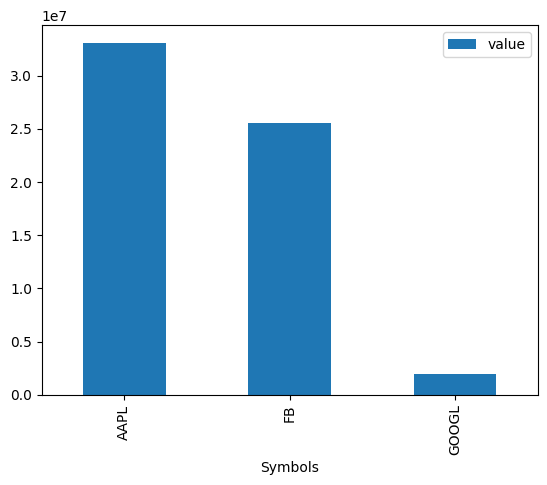

In [332]:
volume_melted.groupby(['Symbols']).mean().plot.bar()

In [329]:
pd.crosstab(
    index = volume_melted['Symbols'],
    columns = 'coba',
    values= volume_melted['value'],
    aggfunc= 'mean'
)

col_0,coba
Symbols,
AAPL,3.309932e+07
FB,2.559525e+07
GOOGL,1.924978e+06


## Visualizing Barchart for Comparison

Let's try and experiment with pandas' `plot` parameter from the **Parameters** list:

- **kind** : _str_
    - 'bar': bar chart
    
Say we would like to compare the average daily volume sold from the companies. To do that, we will need to extract volume attribute from our dataframe, and perform a melt function:

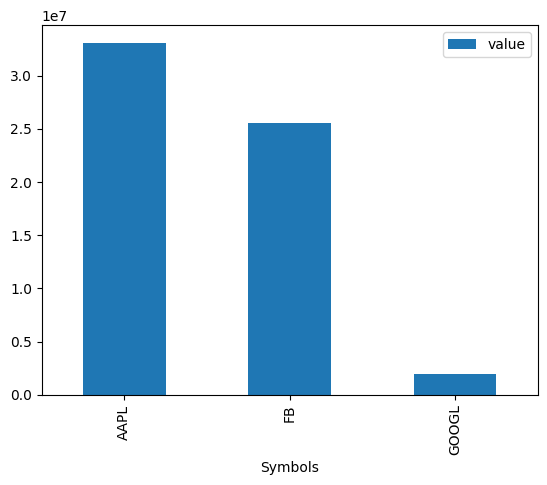

In [334]:
volume_melted.groupby('Symbols').mean().plot(kind='bar')

If we were to compare the visualization to the numerical figure, it is far way easier to compare each stock's average volume. Now let's consider this following data frame:

In [336]:
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.round(2)
aapl['Close_Diff'] = aapl['Close'].diff()
aapl['Weekday'] = aapl.index.day_name()
aapl['Month'] = aapl.index.month_name()
aapl

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff,Weekday,Month
Date,,,,,,,,,
2018-01-02,166.80,172.26,172.30,169.26,170.16,25555900.0,NaN,Tuesday,January
2018-01-03,166.77,172.23,174.55,171.96,172.53,29517900.0,-0.03,Wednesday,January
2018-01-04,167.55,173.03,173.47,172.08,172.54,22434600.0,0.80,Thursday,January
2018-01-05,169.46,175.00,175.37,173.05,173.44,23660000.0,1.97,Friday,January
2018-01-08,168.83,174.35,175.61,173.93,174.35,20567800.0,-0.65,Monday,January
...,...,...,...,...,...,...,...,...,...
2019-04-17,200.51,203.13,203.38,198.61,199.54,28906800.0,3.88,Wednesday,April
2019-04-18,201.23,203.86,204.15,202.52,203.12,24195800.0,0.73,Thursday,April
2019-04-22,201.89,204.53,204.94,202.34,202.83,19439500.0,0.67,Monday,April


Pay special attention to how the Close_Diff column was created. It's the difference between the Close value of a stock price on a given day and the following day.

Supposed we want to compare the Close_Diff between each Weekday; On average, does Tuesday record a higher difference between the Close price of Apple stock compared to a Thursday?

In [340]:
aapl.groupby('Weekday').mean()

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff
Weekday,,,,,,,
Friday,181.440606,185.425455,187.314848,183.676970,185.743636,3.663884e+07,-0.464848
Monday,181.790000,185.754516,187.599516,183.823065,185.788226,3.276606e+07,0.000484
Thursday,181.983731,186.024179,187.768806,184.261940,185.905075,3.297499e+07,0.084776
Tuesday,182.493582,186.539254,188.197910,184.630896,186.133284,3.084036e+07,0.313485
Wednesday,182.264925,186.287612,188.078358,184.316418,186.125224,3.232156e+07,0.584776


Now to create the same bar chart using `plot` function:

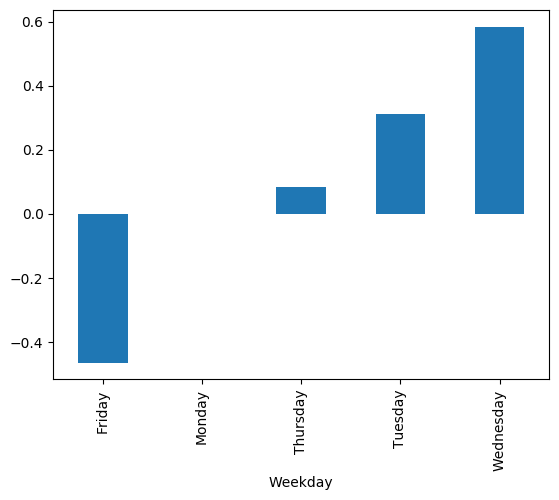

In [347]:
aapl.groupby('Weekday').mean()['Close_Diff'].plot(kind='bar')

We can also improve our visualization efficiency by average transaction volume values in advance, so then the bars from our plot will be arranged based on the value, rather than the weekday's alphabetical order.

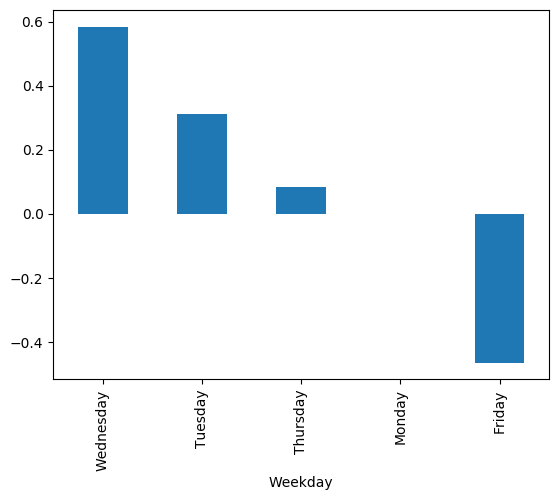

In [349]:
# aapl.groupby('Weekday').mean()['Close_Diff'].plot(kind='bar')
aapl.groupby('Weekday').mean()['Close_Diff'].sort_values(ascending=False).plot(kind='bar')

We can also created a manually ordered index by specifying the order of the day.

In [362]:
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

aapl_wday = aapl.groupby('Weekday').mean()['Close_Diff']

In [365]:
aapl_wday.index = pd.CategoricalIndex(aapl_wday.index,\
                                      categories=wday,\
                                      ordered=True)

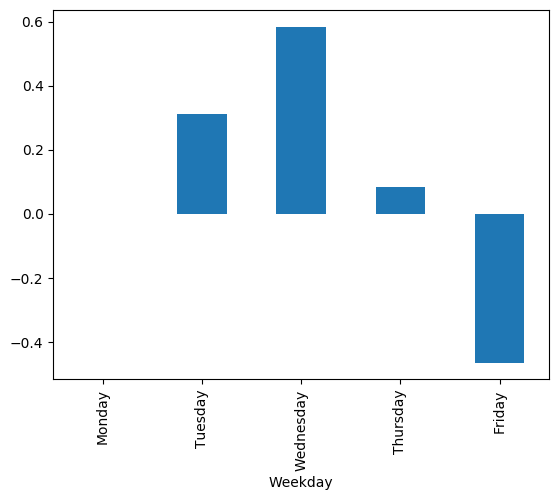

In [356]:
aapl_wday.sort_index().plot(kind='bar')

## Using Grouped Barchart

If you pay close attention to the index of `stock`, you may already realized by now that there are days where no records were present. 2018-01-01, 2018-01-06, and 2018-01-07 were absent from our DataFrame because they happen to fall on weekends.

While the trading hours of [different stock markets differ](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) (the NYSE for example open its market floor from 9.30am to 4pm five days a week), on weekends as well as federal holidays all stock exchanges are closed for business.

We can create (or recreate) the index by passing in our own values. In the following cell we created a date range and create the index using that new date range:

In [370]:
closingprice = stock['Close']
quarter1 = pd.date_range(start="2019-01-01", end="2019-03-31")
closingprice = closingprice.reindex(quarter1)
closingprice.head(8)

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,157.919998,135.679993,1054.680054
2019-01-03,142.190002,131.740005,1025.469971
2019-01-04,148.259995,137.949997,1078.069946
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
2019-01-07,147.929993,138.050003,1075.920044
2019-01-08,150.750000,142.529999,1085.369995


Then, use `.isna().sum()` to count the number of missing values in each of the columns present in `closingprice`.

If there are any missing values, use the `.fillna(method='ffill')` method to fill those missing values:

In [371]:
closingprice.isna().sum()

Symbols
AAPL     29
FB       29
GOOGL    29
dtype: int64

In [384]:
## Your code below
closingprice = closingprice.fillna(method='ffill').fillna(method='bfill') # 
## -- Solution code

Once we are done fill in the missing values we can try to visualize using a grouped barchart to compare each month's closing price for the first quarter of 2019 and compare it for the 3 stocks.

In [394]:


# Create new columns denoting the month of each row 

## your code below 
closingprice['Month'] = closingprice.index.month_name()

In [397]:
closingprice

Symbols,AAPL,FB,GOOGL,Month
2019-01-01,157.919998,135.679993,1054.680054,January
2019-01-02,157.919998,135.679993,1054.680054,January
2019-01-03,142.190002,131.740005,1025.469971,January
2019-01-04,148.259995,137.949997,1078.069946,January
2019-01-05,148.259995,137.949997,1078.069946,January
...,...,...,...,...
2019-03-27,188.470001,165.869995,1178.010010,March
2019-03-28,188.720001,165.550003,1172.270020,March
2019-03-29,189.949997,166.690002,1176.890015,March
2019-03-30,189.949997,166.690002,1176.890015,March


In [402]:
average_closing =closingprice.copy()

In [404]:
months=average_closing['Month'].unique()

In [407]:
average_closing

Symbols,AAPL,FB,GOOGL
Month,,,
February,171.210357,164.600715,1119.318220
January,154.273870,145.199998,1082.756135
March,183.199033,166.884516,1181.211623


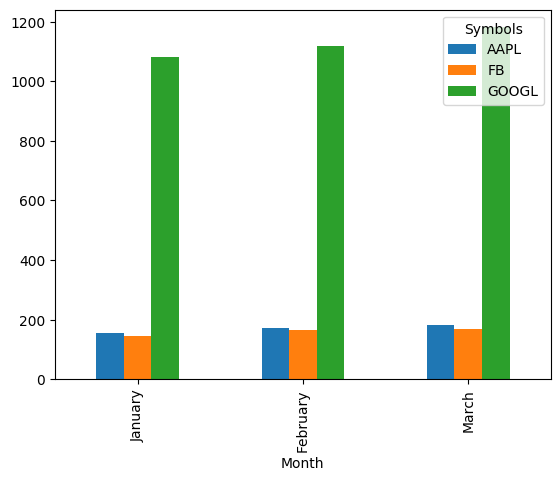

In [406]:
average_closing = average_closing.groupby('Month').mean()
average_closing.index = pd.CategoricalIndex(average_closing.index,\
                                            categories=months,\
                                            ordered=True)

average_closing.sort_index().plot(kind='bar')

A full reference to [the official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) on this method would be outside the scope of this coursebook, but is worth a read. 

## Combining `agg` and `groupby`

So far, we have explored several pandas aggregational toolkit, such as:
- `pd.crosstab()`
- `pd.pivot_table()`

In this chapter, we'll explore another pandas' aggregating tools:
- `groupby` aggregation.

**Disucission:**

(`pivot_table` & `pd.crosstab` equivalency)

The `pivot_table` method and the `crosstab` function can both produce the exact same results with the same shape. They both share the parameters; `index`, `columns`, `values`, and `aggfunc`. 

The major difference on the surface is that `crosstab` is a function and not a DataFrame method. This forces you to use columns as Series and not string names for the parameters.

1. Suppose you want to compare the number of total transactions over Weekdays of each quarter period. Create a `pivot_table` that solve the problem!


2. Try to reproduce the same result by using `crosstab`


3. What if, instead of compare the total transactions, you want to compare the total revenue from the same period? Use both `pivot_table` and `crosstab` as the solution. Discuss with your friend, which method is more relevant in this case?

Pay attention to the following group by operation:

In [409]:
stock.stack().reset_index().groupby('Symbols').mean()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,,,,,,
AAPL,181.999411,186.011794,187.796262,184.148116,185.941976,3.310283e+07
FB,169.509817,169.509817,171.487569,167.374651,169.365623,2.560214e+07
GOOGL,1128.668451,1128.668451,1140.358233,1116.311766,1128.531643,1.925102e+06


In [408]:
stock.stack().reset_index().groupby('Symbols').agg({
    'Close': 'mean',
    'High': 'max',
    'Low': 'min'
})

,Close,High,Low
Symbols,,,
AAPL,186.011794,233.470001,142.000000
FB,169.509817,218.619995,123.019997
GOOGL,1128.668451,1291.439941,977.659973


Say we would like to know a glimpse of the maximum stock price, minimum stock price, and the average of closing price from the 3 companies. To do that, we'll need to combine `groupby` with `agg` and map each column with its designated of the aggregation function.

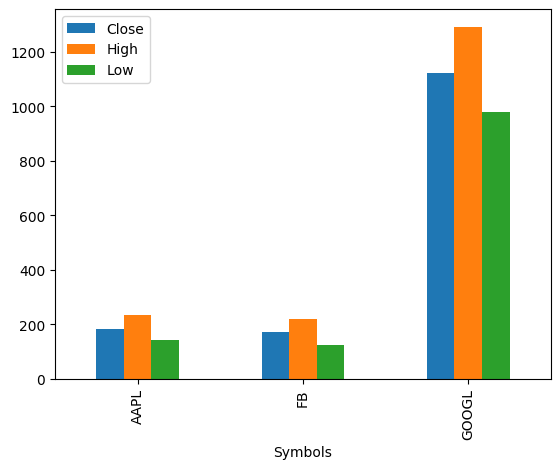

In [411]:
stock.stack().reset_index().groupby('Symbols').agg({
    'Close': 'median',
    'High': 'max',
    'Low': 'min'
}).plot.bar()

**Knowledge Check:** Using `plot`

Consider the following data frame:

In [425]:
import datetime

stock['YearMonth'] = pd.to_datetime(stock.index.date).to_period('M')
monthly_closing = stock.groupby('YearMonth').mean().loc[:,['Close','Low', 'High']]
monthly_closing.head()

Attributes       Close                                 High              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
YearMonth                                                                 
2018-01     174.005237  184.962856  1139.394293  175.203334  186.210951   
2018-02     167.638947  180.269473  1091.880002  169.887893  183.131581   
2018-03     174.496192  173.489522  1093.769060  176.799524  176.145239   
2018-04     169.834287  163.810476  1039.951910  171.657618  166.086190   
2018-05     185.536818  182.930000  1074.852717  186.469091  183.873182   

Attributes                      Low                           
Symbols           GOOGL        AAPL          FB        GOOGL  
YearMonth                                                     
2018-01     1144.575713  172.818096  182.924763  1129.204764  
2018-02     1107.948416  165.479475  177.756316  1078.148428  
2018-03     1110.952869  173.061430  170.508097  1078.952858  
2018-04     1054.315232  168.292382  161.546191  1028.276672  
2018-05     1082.155906  183.862273  180.949998  1063.676824

Which of the following will be appropriate plot to use?

- [ ] Line plot -> .plot()
- [ ] Scatter plot -> .plot.scatter(x=? , y=?)
- [ ] Bar plot -> .plot.bar()
- [ ] Box plot -> .plot.box()

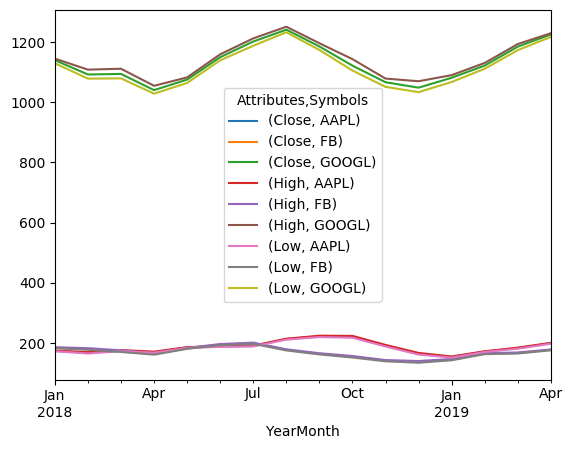

In [426]:
## Your code below
monthly_closing.plot() 
# monthly_closing.plot.bar()
# monthly_closing.plot.box()
# monthly_closing.plot.scatter()

## -- Solution code
